In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install -U stable-baselines3[extra]
!pip install gymnasium[mujoco]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.5/243.5 kB 16.6 MB/s eta 0:00:00


In [3]:
import gymnasium as gym
import numpy as np
import os
import matplotlib.pyplot as plt

from stable_baselines3 import PPO, DDPG, TD3, SAC
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.results_plotter import load_results, ts2xy


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


# **Cell 4 — Paths & Environment Config**

In [4]:
ENV_ID = "Walker2d-v5"

BASE_DIR = "/content/drive/MyDrive/DRL_Walker2D"
MODEL_DIR = f"{BASE_DIR}/models"
LOG_DIR = f"{BASE_DIR}/logs"

os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(LOG_DIR, exist_ok=True)


# **Cell 5 — Environment Factory (Correct & Minimal)**

In [5]:
def make_env(log_name):
    env = gym.make(ENV_ID)
    env = Monitor(env, filename=f"{LOG_DIR}/{log_name}")
    return env


# **Cell 6 — Train PPO (On-Policy)**

In [ ]:
env = make_env("ppo")

ppo = PPO(
    "MlpPolicy",
    env,
    learning_rate=3e-4,
    n_steps=2048,
    batch_size=64,
    gamma=0.99,
    verbose=1,
    device="cuda"
)

ppo.learn(total_timesteps=400_000)
ppo.save(f"{MODEL_DIR}/ppo_walker2d")

env.close()


Using cuda device
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.12/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 18.3     |
|    ep_rew_mean     | -0.453   |
| time/              |          |
|    fps             | 562      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 20.9        |
|    ep_rew_mean          | 1.51        |
| time/                   |             |
|    fps                  | 456         |
|    iterations           | 2           |
|    time_elapsed         | 8           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.019258957 |
|    clip_fraction        | 0.253       |
|    clip_range           | 0.2         |
|    entropy_loss         | -8.49       |
|    explained_variance   | -0.0833     |
|    learning_rate        | 0.

# **Cell 7 — Train DDPG (Deterministic, Noise-Sensitive)**

In [ ]:
env = make_env("ddpg")

n_actions = env.action_space.shape[0]
action_noise = NormalActionNoise(
    mean=np.zeros(n_actions),
    sigma=0.1 * np.ones(n_actions)
)

ddpg = DDPG(
    "MlpPolicy",
    env,
    learning_rate=1e-3,
    buffer_size=1_000_000,
    batch_size=256,
    gamma=0.99,
    tau=0.005,
    action_noise=action_noise,
    verbose=1,
    device="cuda"
)

ddpg.learn(total_timesteps=400_000)
ddpg.save(f"{MODEL_DIR}/ddpg_walker2d")

env.close()


Streaming output truncated to the last 5000 lines.
|    actor_loss      | -825     |
|    critic_loss     | 465      |
|    learning_rate   | 0.001    |
|    n_updates       | 103893   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 184      |
|    ep_rew_mean     | 145      |
| time/              |          |
|    episodes        | 1032     |
|    fps             | 123      |
|    time_elapsed    | 850      |
|    total_timesteps | 104619   |
| train/             |          |
|    actor_loss      | -808     |
|    critic_loss     | 1.72e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 104518   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 178      |
|    ep_rew_mean     | 143      |
| time/              |          |
|    episodes        | 1036     |
|    fps             | 123      |
|    time_elapsed    | 858     

# **Cell 8 — Train TD3 (Improved DDPG)**

In [ ]:
env = make_env("td3")

td3 = TD3(
    "MlpPolicy",
    env,
    learning_rate=1e-3,
    buffer_size=1_000_000,
    batch_size=256,
    gamma=0.99,
    tau=0.005,
    action_noise=action_noise,
    verbose=1,
    device="cuda"
)

td3.learn(total_timesteps=400_000)
td3.save(f"{MODEL_DIR}/td3_walker2d")

env.close()


Using cuda device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 16       |
|    ep_rew_mean     | -1.05    |
| time/              |          |
|    episodes        | 4        |
|    fps             | 1034     |
|    time_elapsed    | 0        |
|    total_timesteps | 64       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 28.6     |
|    ep_rew_mean     | 24       |
| time/              |          |
|    episodes        | 8        |
|    fps             | 194      |
|    time_elapsed    | 1        |
|    total_timesteps | 229      |
| train/             |          |
|    actor_loss      | -1.12    |
|    critic_loss     | 0.0265   |
|    learning_rate   | 0.001    |
|    n_updates       | 128      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 43.6  

# **Cell 9 — Train SAC (Entropy-Regularized)**

In [ ]:
env = make_env("sac")

sac = SAC(
    "MlpPolicy",
    env,
    learning_rate=3e-4,
    buffer_size=1_000_000,
    batch_size=256,
    gamma=0.99,
    verbose=1,
    device="cuda"
)

sac.learn(total_timesteps=400_000)
sac.save(f"{MODEL_DIR}/sac_walker2d")

env.close()


Using cuda device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.5     |
|    ep_rew_mean     | 8.97     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 922      |
|    time_elapsed    | 0        |
|    total_timesteps | 106      |
| train/             |          |
|    actor_loss      | -5.21    |
|    critic_loss     | 9.62     |
|    ent_coef        | 0.999    |
|    ent_coef_loss   | -0.0118  |
|    learning_rate   | 0.0003   |
|    n_updates       | 5        |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.2     |
|    ep_rew_mean     | 6.72     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 167      |
|    time_elapsed    | 1        |
|    total_timesteps | 202      |
| train/             |          |
|    actor_loss      | -9.08 

# **Cell 10 — Plot Learning Curves (CRITICAL FOR REPORT)**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os


In [7]:
def plot_from_monitor(file_path, algo_name):
    df = pd.read_csv(file_path, skiprows=1)  # skip metadata row
    plt.figure(figsize=(9, 5))
    plt.plot(df["t"], df["r"])
    plt.xlabel("seconds since training start")
    plt.ylabel("Episode Reward")
    plt.title(f"{algo_name} on Walker2D")
    plt.grid()
    plt.show()


In [20]:
def plot_mean_reward_from_monitor(file_path, algo_name):
    df = pd.read_csv(file_path, skiprows=1)  # skip metadata row
    plt.figure(figsize=(9, 5))
    plt.plot(df["t"], df["r"].rolling(50).mean())
    plt.xlabel("seconds since training start")
    plt.ylabel("Episode Mean_Reward")
    plt.title(f"{algo_name} on Walker2D")
    plt.grid()
    plt.show()


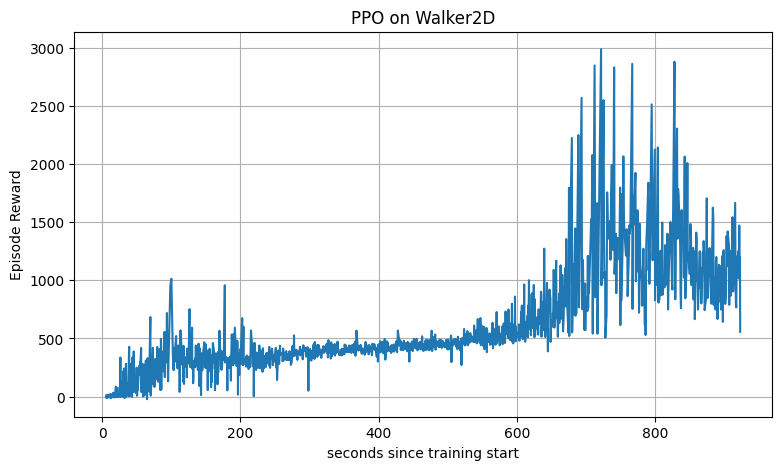

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [21]:
plot_from_monitor(
    "/content/drive/MyDrive/DRL_Walker2D/logs/ppo.monitor.csv",
    "PPO"
)


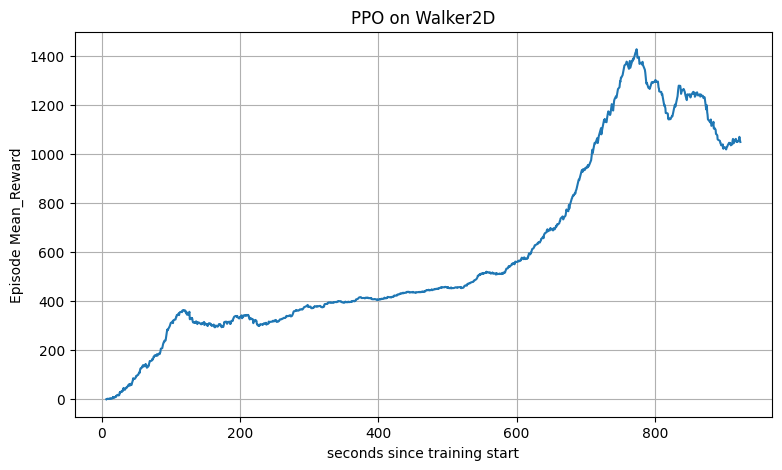

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [22]:
plot_mean_reward_from_monitor(
    "/content/drive/MyDrive/DRL_Walker2D/logs/ppo.monitor.csv",
    "PPO"
)


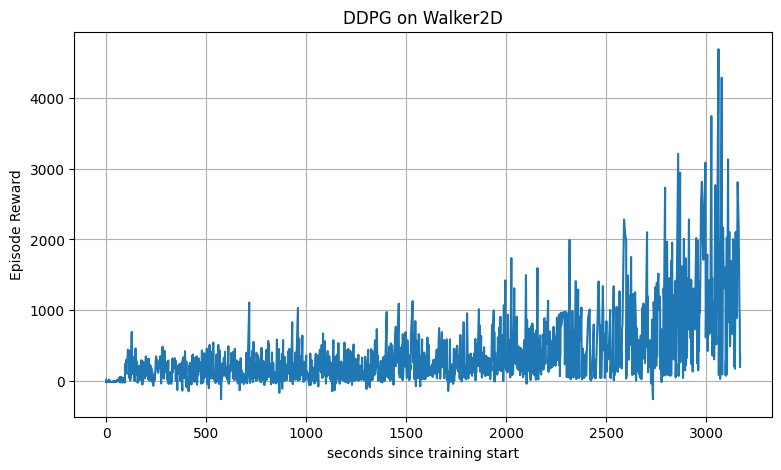

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [23]:
plot_from_monitor(
    "/content/drive/MyDrive/DRL_Walker2D/logs/ddpg.monitor.csv",
    "DDPG"
)


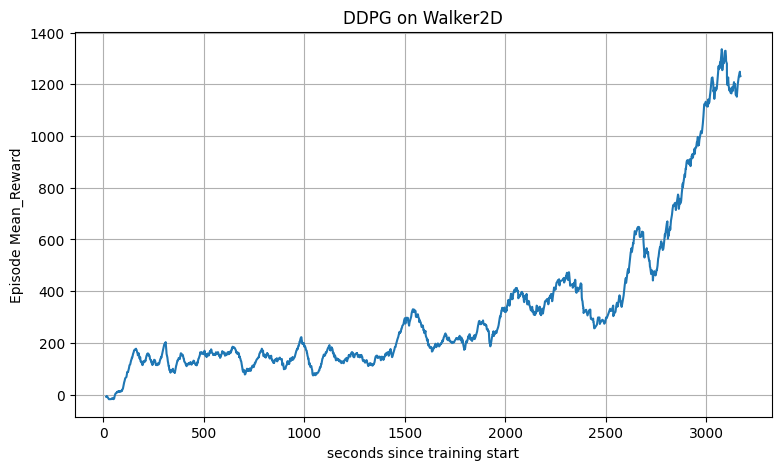

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [24]:
plot_mean_reward_from_monitor(
    "/content/drive/MyDrive/DRL_Walker2D/logs/ddpg.monitor.csv",
    "DDPG"
)


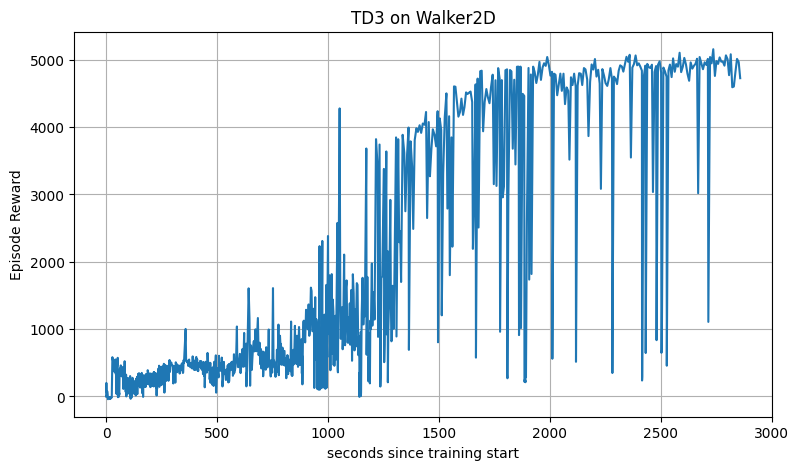

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [25]:
plot_from_monitor(
    "/content/drive/MyDrive/DRL_Walker2D/logs/td3.monitor.csv",
    "TD3"
)


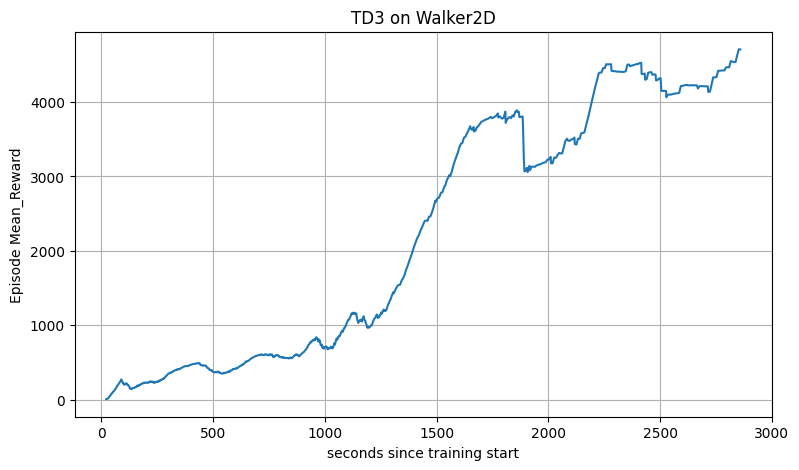

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [26]:
plot_mean_reward_from_monitor(
    "/content/drive/MyDrive/DRL_Walker2D/logs/td3.monitor.csv",
    "TD3"
)


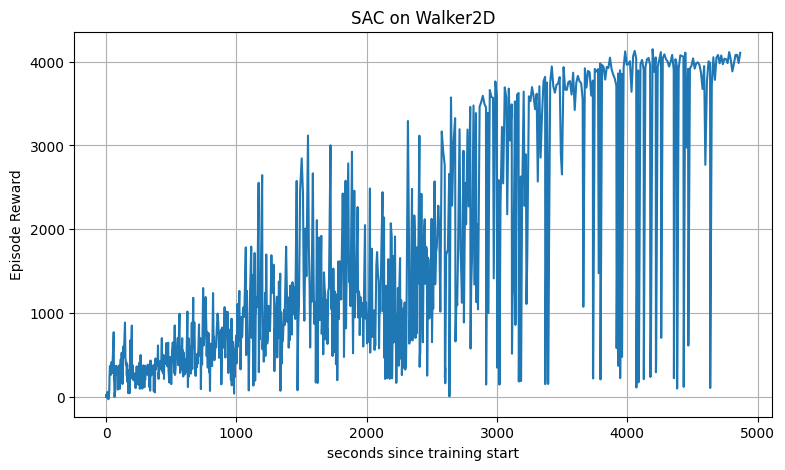

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [27]:
plot_from_monitor(
    "/content/drive/MyDrive/DRL_Walker2D/logs/sac.monitor.csv",
    "SAC"
)


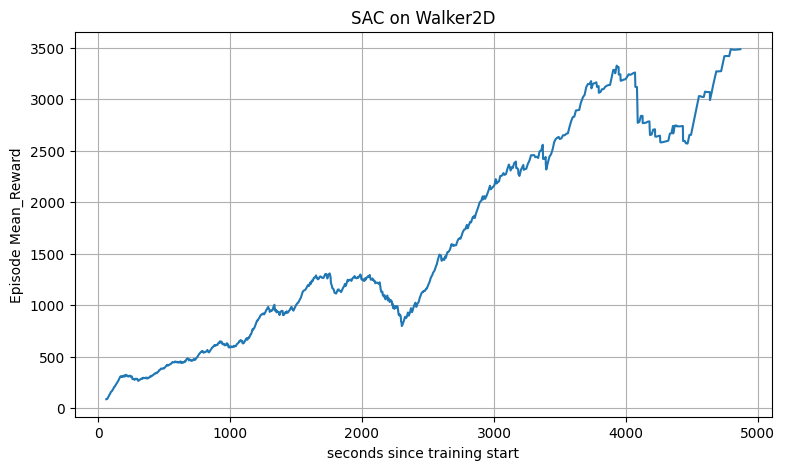

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [28]:
plot_mean_reward_from_monitor(
    "/content/drive/MyDrive/DRL_Walker2D/logs/sac.monitor.csv",
    "SAC"
)


# **Mean Reward Plotting**